1/1 [==============================] - 0s 28ms/step


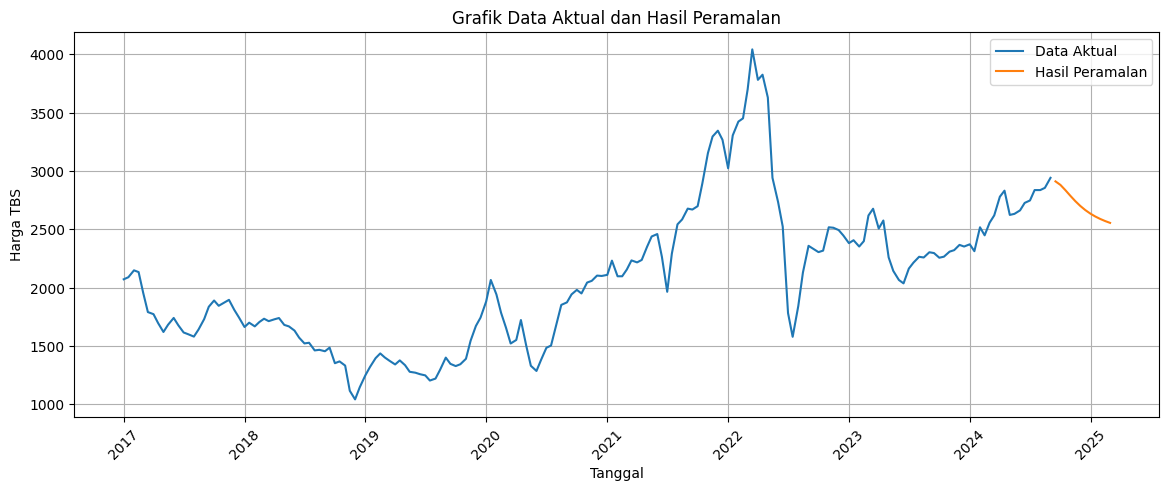

 Grafik Peramalan Harga TBS 6 tbulan Kedepan: [2910.5415 2880.1843 2835.1184 2786.8594 2740.9226 2699.9482 2664.7107
 2634.9314 2609.8591 2588.6328 2570.4617 2554.6958]


In [20]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Muat model yang disimpan
model = load_model('best_gru_model2.h5')

# Fungsi untuk membuat sequence data
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
    return np.array(X)

# Load dataset yang akan diprediksi
df = pd.read_csv("tbs_kalbar.csv", delimiter=';')
df = df.iloc[:, :2]  # Keep only the first two columns
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')
df['Harga'] = df['Harga'].str.replace(',', '.').astype(float)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(df['Harga'].values.reshape(-1, 1))

# Tentukan sequence length yang sama
seq_length = 40

# Buat sequence untuk data terbaru
X_new = create_sequences(data_normalized, seq_length)

# Ambil sequence terakhir untuk membuat prediksi ke depan
current_sequence = data_normalized[-seq_length:]

# Fungsi untuk memprediksi periode ke depan
def predict_future(model, data, seq_length, future_periods):
    predictions = []
    current_sequence = data[-seq_length:]
    
    for _ in range(future_periods):
        prediction = model.predict(current_sequence.reshape(1, seq_length, 1))
        predictions.append(prediction[0, 0])
        current_sequence = np.append(current_sequence[1:], prediction, axis=0)
    
    return np.array(predictions)

# Prediksi 12 periode ke depan (contoh)
future_periods = 12
future_predictions = predict_future(model, data_normalized, seq_length, future_periods)
future_predictions_denormalized = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Tampilkan hasil prediksi
dates_future = pd.date_range(start=df['Tanggal'].iloc[-1], periods=future_periods + 1, freq='15D')[1:]

plt.figure(figsize=(14, 5))
plt.plot(df['Tanggal'], df['Harga'], label='Data Aktual')
plt.plot(dates_future, future_predictions_denormalized[:len(dates_future)], label='Hasil Peramalan')
plt.legend()
plt.title('Grafik Data Aktual dan Hasil Peramalan')
plt.xlabel('Tanggal')
plt.ylabel('Harga TBS')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
print(f' Grafik Peramalan Harga TBS 6 tbulan Kedepan: {future_predictions_denormalized.flatten()}')


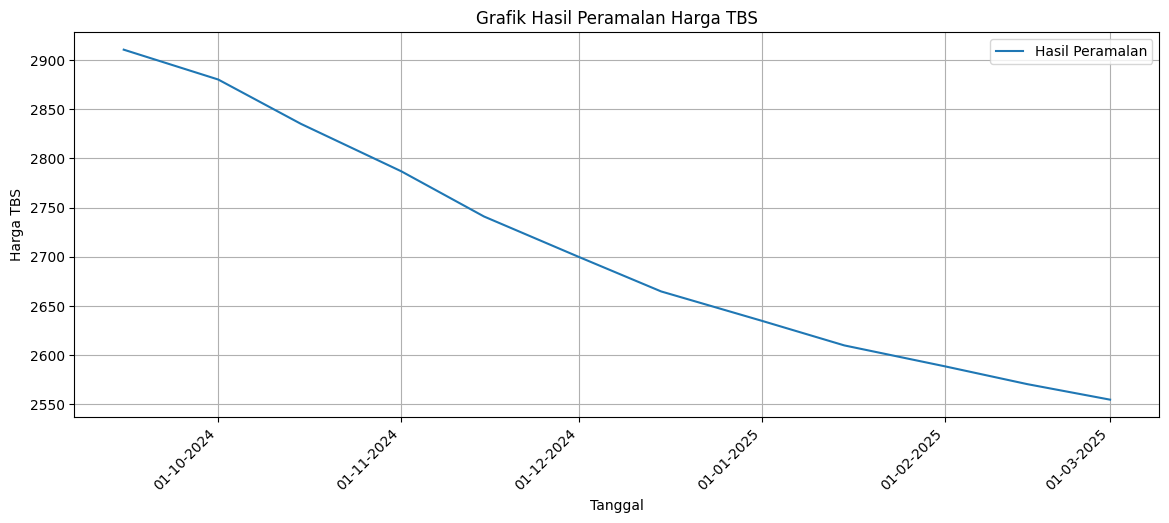

In [21]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

# Data tanggal sesuai permintaan
dates = ['2024-09-15', '2024-10-01', '2024-10-15', '2024-11-01', 
         '2024-11-15', '2024-12-01', '2024-12-15', '2025-01-01', 
         '2025-01-15', '2025-02-01', '2025-02-15', '2025-03-01'
]

# Konversi ke DatetimeIndex
DatetimeIndex = pd.to_datetime(dates)


# Plot hasil prediksi
plt.figure(figsize=(14, 5))
plt.plot(DatetimeIndex, future_predictions_denormalized[:len(DatetimeIndex)], label='Hasil Peramalan')
plt.legend()
plt.title('Grafik Hasil Peramalan Harga TBS')
plt.xlabel('Tanggal')
plt.ylabel('Harga TBS')
plt.grid(True)

# Format sumbu x untuk menampilkan tanggal secara lengkap (hari, bulan, tahun)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotasi label tanggal agar tidak tumpang tindih
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.show()
